# 1083 Albumin Analysis

### By: Ian Weimer

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [2]:
df_alb = pd.read_csv('gi_bleed_anemia_all.csv')

In [3]:
df_alb.head()

Unnamed: 0                              personid  \
0           0  001c4742-8e99-4929-9b1c-0b8c6f3e230a   
1           1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f   
2           2  01d02e7a-3cd1-47dd-9d5f-188e591a04df   
3           3  05b4f125-f42f-4ade-ad65-f6d591c51790   
4           4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6   

                            encounterid           index_date   age sex   race  \
0  4f8fae0f-a286-4120-b78c-c60086d95f88  2019-05-31 13:58:00  45.0   M  Black   
1  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a  2019-03-07 20:26:00  54.0   F  White   
2  eef69bb8-c0a3-425d-b016-7df3a2903ed5  2019-07-17 23:07:00  79.0   M  White   
3  2ae26cea-7902-40ea-9f24-d65f49d03724  2020-06-21 14:45:00  75.0   M  Other   
4  2227d951-5657-47a0-aa62-4dcd86d6d04d  2017-01-12 17:18:00  74.0   F  Black   

   zip_code bed_size  ICU    LOS_hours  mass_transfusion  total_transfusions  \
0         1   >=1000    1  1016.016667                 0                   1   
1         7  500-999    1   531.133333                 1                   0   
2         9   >=1000    0    26.383333                 0                   1   
3         1   >=1000    0    50.916667                 0                   1   
4         1   >=1000    0  1500.383333                 0                   0   

  anemia_status  CCI  30_day_mortality  30_day_readmission  tenant  
0      moderate    6                 0                   0      45  
1        severe    4                 0                   1      36  
2        severe    6                 0                   1       7  
3          mild    2                 1                   0      45  
4        severe    6                 0                   0      46

In [4]:
df_alb.shape

(22192, 18)

In [5]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 20734
Number of unique encounters: 22192


## Load Non Albumin Data

In [6]:
df_no_alb = pd.read_csv('no_albumin_gi_bleed_anemia_all.csv')

In [7]:
df_no_alb.head()

Unnamed: 0                              personid  \
0           0  0034c8e8-d981-401f-99c3-49c522415c3f   
1           1  0094a748-b23f-4704-8df0-6f6c112c022d   
2           2  009e66f6-5527-48bc-af91-f624389ebc0f   
3           3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5   
4           4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a   

                            encounterid           index_date   age sex   race  \
0  cf7ca286-ddc2-4e64-ae66-d660698de715  2018-12-11 02:47:00  76.0   M  White   
1  3d654b3b-e615-4805-8d23-4c5498246111  2018-12-22 18:14:00  80.0   F  White   
2  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2  2017-05-20 15:01:00  62.0   M  White   
3  ae85bfb3-a977-4dfe-96cf-4c63d10af095  2018-11-29 21:57:00  86.0   M  White   
4  2d33ea02-bf05-4f51-b815-13f8e39edef1  2020-02-08 21:45:16  75.0   F  White   

   zip_code bed_size  ICU   LOS_hours  mass_transfusion  total_transfusions  \
0         8   >=1000    0  208.016667                 0                   0   
1         1   >=1000    0  245.266667                 0                   1   
2         9   >=1000    0   51.650000                 0                   0   
3         0  500-999    0  191.700000                 0                   1   
4         3  500-999    0  121.412222                 0                   1   

  anemia_status  CCI  30_day_mortality  30_day_readmission  tenant  
0        severe    2                 0                   0      63  
1        severe    2                 0                   0      45  
2      moderate    3                 0                   1      68  
3      moderate    2                 0                   1      51  
4      moderate    5                 0                   0     113

In [8]:
df_no_alb.shape

(134739, 18)

In [9]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 106515
Number of unique encounters: 134739


## Remove variables not relevant to analysis 

In [10]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['Unnamed: 0', 'index_date'], inplace=True)

df_no_alb.drop(columns = ['Unnamed: 0', 'index_date'], inplace=True)

## Create binary "Albumin" variable for both datasets

In [11]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [12]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [13]:
df_alb.shape

(22192, 17)

In [14]:
df_no_alb.shape

(134739, 17)

In [15]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0   M  Black         1   >=1000    1  1016.016667                 0   
1  54.0   F  White         7  500-999    1   531.133333                 1   
2  79.0   M  White         9   >=1000    0    26.383333                 0   
3  75.0   M  Other         1   >=1000    0    50.916667                 0   
4  74.0   F  Black         1   >=1000    0  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0        severe    4                 0   
2                   1        severe    6                 0   
3                   1          mild    2                 1   
4                   0        severe    6                 0   

   30_day_readmission  tenant  albumin  
0                   0      45        1  
1                   1      36        1  
2                   1       7        1  
3                   0      45        1  
4                   0      46        1

In [16]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

    age sex   race  zip_code bed_size  ICU   LOS_hours  mass_transfusion  \
0  76.0   M  White         8   >=1000    0  208.016667                 0   
1  80.0   F  White         1   >=1000    0  245.266667                 0   
2  62.0   M  White         9   >=1000    0   51.650000                 0   
3  86.0   M  White         0  500-999    0  191.700000                 0   
4  75.0   F  White         3  500-999    0  121.412222                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   0        severe    2                 0   
1                   1        severe    2                 0   
2                   0      moderate    3                 0   
3                   1      moderate    2                 0   
4                   1      moderate    5                 0   

   30_day_readmission  tenant  albumin  
0                   0      63        0  
1                   0      45        0  
2                   1      68        0  
3                   1      51        0  
4                   0     113        0

## Combine Datasets

In [17]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [18]:
df.shape

(156931, 17)

In [19]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0   M  Black         1   >=1000    1  1016.016667                 0   
1  54.0   F  White         7  500-999    1   531.133333                 1   
2  79.0   M  White         9   >=1000    0    26.383333                 0   
3  75.0   M  Other         1   >=1000    0    50.916667                 0   
4  74.0   F  Black         1   >=1000    0  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0        severe    4                 0   
2                   1        severe    6                 0   
3                   1          mild    2                 1   
4                   0        severe    6                 0   

   30_day_readmission  tenant  albumin  
0                   0      45        1  
1                   1      36        1  
2                   1       7        1  
3                   0      45        1  
4                   0      46        1

In [20]:
df.columns

Index(['personid', 'encounterid', 'age', 'sex', 'race', 'zip_code', 'bed_size',
       'ICU', 'LOS_hours', 'mass_transfusion', 'total_transfusions',
       'anemia_status', 'CCI', '30_day_mortality', '30_day_readmission',
       'tenant', 'albumin'],
      dtype='object')

## Look at variables, null values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156931 entries, 0 to 134738
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   personid            156931 non-null  object 
 1   encounterid         156931 non-null  object 
 2   age                 156928 non-null  float64
 3   sex                 156568 non-null  object 
 4   race                149962 non-null  object 
 5   zip_code            156931 non-null  int64  
 6   bed_size            156870 non-null  object 
 7   ICU                 156931 non-null  int64  
 8   LOS_hours           156910 non-null  float64
 9   mass_transfusion    156931 non-null  int64  
 10  total_transfusions  156931 non-null  int64  
 11  anemia_status       156931 non-null  object 
 12  CCI                 156931 non-null  int64  
 13  30_day_mortality    156931 non-null  int64  
 14  30_day_readmission  156931 non-null  int64  
 15  tenant              156931 non-nul

In [22]:
df.isnull().sum()

personid                 0
encounterid              0
age                      3
sex                    363
race                  6969
zip_code                 0
bed_size                61
ICU                      0
LOS_hours               21
mass_transfusion         0
total_transfusions       0
anemia_status            0
CCI                      0
30_day_mortality         0
30_day_readmission       0
tenant                   0
albumin                  0
dtype: int64

In [23]:
df['race'].value_counts()

White      114079
Other       18417
Black       16008
Unknown      1458
Name: race, dtype: int64

In [24]:
df['sex'].value_counts()

M    85572
F    70991
O        5
Name: sex, dtype: int64

In [25]:
df['bed_size'].value_counts()

>=1000     99196
500-999    39977
300-499    11803
200-299     3911
<100        1365
100-199      618
Name: bed_size, dtype: int64

## Fill or Drop Rows with Null Values, Other

In [26]:
# fill null race values with 'Unknown'
# df['race'] = df['race'].fillna('Unknown')

In [27]:
# df.isnull().sum()

In [28]:
# df['race'].value_counts()

In [29]:
# after considering encoding, I chose to drop race 
# variable entirely, as it would require one-hot encoding 
# to be properly represented, in contrast to the other variables

df.drop(columns = ['race'], inplace=True)

In [30]:
df.shape

(156931, 16)

In [31]:
# remove 'O' in sex, as it has only 5 values
df.drop(df[df['sex'] == 'O'].index, inplace=True)

In [32]:
df['sex'].value_counts()

M    85570
F    70990
Name: sex, dtype: int64

In [33]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [34]:
df.shape

(156475, 16)

In [35]:
pct_lost = ((156931 - 156475) / 156931)*100
print('Percentage of rows dropped:', pct_lost)

Percentage of rows dropped: 0.2905735641778871


In [36]:
print('Number of unique patients:', df.personid.nunique())
print('Number of unique encounters:', df.encounterid.nunique())

Number of unique patients: 122405
Number of unique encounters: 156475


In [37]:
# albumin patients/encounters remaining
adf = df[df['albumin'] == 1]
print('Number of unique patients:', adf.personid.nunique())
print('Number of unique encounters:', adf.encounterid.nunique())

Number of unique patients: 20684
Number of unique encounters: 22142


In [38]:
# non-albumin patients/encounters remaining
nadf = df [df['albumin'] == 0]
print('Number of unique patients:', nadf.personid.nunique())
print('Number of unique encounters:', nadf.encounterid.nunique())

Number of unique patients: 106207
Number of unique encounters: 134333


## Drop patientid and encounterid variables

In [39]:
#these will not be useful for exploratory analyis / modeling
df.drop(columns = ['personid', 'encounterid'], inplace=True)

In [40]:
df.shape

(156475, 14)

In [41]:
df.head()

age sex  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0   M         1   >=1000    1  1016.016667                 0   
1  54.0   F         7  500-999    1   531.133333                 1   
2  79.0   M         9   >=1000    0    26.383333                 0   
3  75.0   M         1   >=1000    0    50.916667                 0   
4  74.0   F         1   >=1000    0  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0        severe    4                 0   
2                   1        severe    6                 0   
3                   1          mild    2                 1   
4                   0        severe    6                 0   

   30_day_readmission  tenant  albumin  
0                   0      45        1  
1                   1      36        1  
2                   1       7        1  
3                   0      45        1  
4                   0      46        1

In [42]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156475 entries, 0 to 134738
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 156475 non-null  float64
 1   sex                 156475 non-null  object 
 2   zip_code            156475 non-null  int64  
 3   bed_size            156475 non-null  object 
 4   ICU                 156475 non-null  int64  
 5   LOS_hours           156475 non-null  float64
 6   mass_transfusion    156475 non-null  int64  
 7   total_transfusions  156475 non-null  int64  
 8   anemia_status       156475 non-null  object 
 9   CCI                 156475 non-null  int64  
 10  30_day_mortality    156475 non-null  int64  
 11  30_day_readmission  156475 non-null  int64  
 12  tenant              156475 non-null  int64  
 13  albumin             156475 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 17.9+ MB


## Encode Variables as Necessary

In [43]:
# Binary Variables: sex

# Ordinal Variables: bed_size, anemia_status

# Neither: race (removed)

In [44]:
df['sex'].value_counts()

M    85528
F    70947
Name: sex, dtype: int64

In [45]:
df['bed_size'].value_counts()

>=1000     98973
500-999    39832
300-499    11780
200-299     3909
<100        1364
100-199      617
Name: bed_size, dtype: int64

In [46]:
df['anemia_status'].value_counts()

severe      72057
moderate    56780
none        23327
mild         4311
Name: anemia_status, dtype: int64

In [47]:
# initialize encoders
# used labelencoder() for binary variable
sex_enc = preprocessing.LabelEncoder()

In [48]:
# used ordinal encoder for education and income
# labelencoder() does not work well for these variables
# they are not in the preferred order
# ordinal encoder allows for setting order

bs_ord = [['<100', '100-199', '200-299', '300-499', \
          '500-999', '>=1000']]

as_ord = [['none', 'mild', 'moderate', 'severe']]

transformer = make_column_transformer(
    (OrdinalEncoder(categories=bs_ord), ['bed_size']),
    (OrdinalEncoder(categories=as_ord), ['anemia_status']),
)

In [49]:
sex_enc.fit(df['sex'])

LabelEncoder()

In [50]:
df['sex'] = sex_enc.transform(df['sex'])

In [51]:
df['sex'].value_counts()

1    85528
0    70947
Name: sex, dtype: int64

In [52]:
df.head()

age  sex  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1   >=1000    1  1016.016667                 0   
1  54.0    0         7  500-999    1   531.133333                 1   
2  79.0    1         9   >=1000    0    26.383333                 0   
3  75.0    1         1   >=1000    0    50.916667                 0   
4  74.0    0         1   >=1000    0  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0        severe    4                 0   
2                   1        severe    6                 0   
3                   1          mild    2                 1   
4                   0        severe    6                 0   

   30_day_readmission  tenant  albumin  
0                   0      45        1  
1                   1      36        1  
2                   1       7        1  
3                   0      45        1  
4                   0      46        1

In [53]:
df1 = pd.DataFrame(transformer.fit_transform(df),
                  columns = ['bed_size', 'anemia_status'])

In [54]:
display(df1.dtypes)

bed_size         float64
anemia_status    float64
dtype: object

In [55]:
df1 = df1.astype({"bed_size": 'int', "anemia_status": 'int'})

In [56]:
df1.head()

bed_size  anemia_status
0         5              2
1         4              3
2         5              3
3         5              1
4         5              3

In [57]:
df1['bed_size'].value_counts()

5    98973
4    39832
3    11780
2     3909
0     1364
1      617
Name: bed_size, dtype: int64

In [58]:
df1['anemia_status'].value_counts()

3    72057
2    56780
0    23327
1     4311
Name: anemia_status, dtype: int64

In [59]:
# replace bed_size and anemia_status vars with transformed vars

df['bed_size'] = df1['bed_size']
df['anemia_status'] = df1['anemia_status']

In [60]:
df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1         5    1  1016.016667                 0   
1  54.0    0         7         4    1   531.133333                 1   
2  79.0    1         9         5    0    26.383333                 0   
3  75.0    1         1         5    0    50.916667                 0   
4  74.0    0         1         5    0  1500.383333                 0   

   total_transfusions  anemia_status  CCI  30_day_mortality  \
0                   1              2    6                 0   
1                   0              3    4                 0   
2                   1              3    6                 0   
3                   1              1    2                 1   
4                   0              3    6                 0   

   30_day_readmission  tenant  albumin  
0                   0      45        1  
1                   1      36        1  
2                   1       7        1  
3                   0      45        1  
4                   0      46        1

In [61]:
df.shape

(156475, 14)

In [62]:
f_df = df.copy()

In [63]:
f_df.shape

(156475, 14)

In [64]:
f_df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1         5    1  1016.016667                 0   
1  54.0    0         7         4    1   531.133333                 1   
2  79.0    1         9         5    0    26.383333                 0   
3  75.0    1         1         5    0    50.916667                 0   
4  74.0    0         1         5    0  1500.383333                 0   

   total_transfusions  anemia_status  CCI  30_day_mortality  \
0                   1              2    6                 0   
1                   0              3    4                 0   
2                   1              3    6                 0   
3                   1              1    2                 1   
4                   0              3    6                 0   

   30_day_readmission  tenant  albumin  
0                   0      45        1  
1                   1      36        1  
2                   1       7        1  
3                   0      45        1  
4                   0      46        1

In [65]:
# rearrange columns to put dvs at end

f_df = f_df[['age', 'sex', 'zip_code', 'bed_size', 'ICU', \
          'mass_transfusion', 'total_transfusions', 'anemia_status', \
            'CCI', 'tenant', 'albumin', \
            'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [66]:
f_df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1         5    1                 0                   1   
1  54.0    0         7         4    1                 1                   0   
2  79.0    1         9         5    0                 0                   1   
3  75.0    1         1         5    0                 0                   1   
4  74.0    0         1         5    0                 0                   0   

   anemia_status  CCI  tenant  albumin    LOS_hours  30_day_mortality  \
0              2    6      45        1  1016.016667                 0   
1              3    4      36        1   531.133333                 0   
2              3    6       7        1    26.383333                 0   
3              1    2      45        1    50.916667                 1   
4              3    6      46        1  1500.383333                 0   

   30_day_readmission  
0                   0  
1                   1  
2                   1  
3                   0  
4                   0

In [67]:
# quick look at distributions

f_df.describe()

age            sex       zip_code       bed_size  \
count  156475.000000  156475.000000  156475.000000  156475.000000   
mean       67.667525       0.546592       4.880614       4.475226   
std        15.192300       0.497826       3.365775       0.857829   
min         0.000000       0.000000       0.000000       0.000000   
25%        59.000000       0.000000       1.000000       4.000000   
50%        70.000000       1.000000       6.000000       5.000000   
75%        80.000000       1.000000       8.000000       5.000000   
max        89.000000       1.000000       9.000000       5.000000   

                 ICU  mass_transfusion  total_transfusions  anemia_status  \
count  156475.000000     156475.000000       156475.000000  156475.000000   
mean        0.175530          0.024809            0.781658       2.206563   
std         0.380421          0.155543            1.730041       1.004621   
min         0.000000          0.000000            0.000000       0.000000   
25%         0.000000          0.000000            0.000000       2.000000   
50%         0.000000          0.000000            0.000000       2.000000   
75%         0.000000          0.000000            1.000000       3.000000   
max         1.000000          1.000000           99.000000       3.000000   

                 CCI         tenant        albumin      LOS_hours  \
count  156475.000000  156475.000000  156475.000000  156475.000000   
mean        3.646717      56.405471       0.141505     177.055718   
std         2.706481      25.757826       0.348543     321.773475   
min         0.000000       1.000000       0.000000       0.000000   
25%         1.000000      45.000000       0.000000      65.266667   
50%         3.000000      63.000000       0.000000     101.000000   
75%         5.000000      68.000000       0.000000     189.200000   
max        21.000000     120.000000       1.000000   41219.400000   

       30_day_mortality  30_day_readmission  
count     156475.000000       156475.000000  
mean           0.072280            0.342917  
std            0.258952            0.474686  
min            0.000000            0.000000  
25%            0.000000            0.000000  
50%            0.000000            0.000000  
75%            0.000000            1.000000  
max            1.000000            1.000000

## Check Relationships for Relevant Dependent Vars

## Length of Stay (LOS)

In [68]:
# drop other dvs: 30_day_mortality, 30_day_readmission

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission'])

In [69]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1         5    1                 0                   1   
1  54.0    0         7         4    1                 1                   0   
2  79.0    1         9         5    0                 0                   1   
3  75.0    1         1         5    0                 0                   1   
4  74.0    0         1         5    0                 0                   0   

   anemia_status  CCI  tenant  albumin    LOS_hours  
0              2    6      45        1  1016.016667  
1              3    4      36        1   531.133333  
2              3    6       7        1    26.383333  
3              1    2      45        1    50.916667  
4              3    6      46        1  1500.383333

## Correlations

In [70]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

age                  -0.044955
zip_code             -0.039648
tenant               -0.007556
total_transfusions    0.013890
bed_size              0.014056
sex                   0.020636
anemia_status         0.043893
ICU                   0.103283
mass_transfusion      0.109074
CCI                   0.136159
albumin               0.296659
LOS_hours             1.000000
Name: LOS_hours, dtype: float64


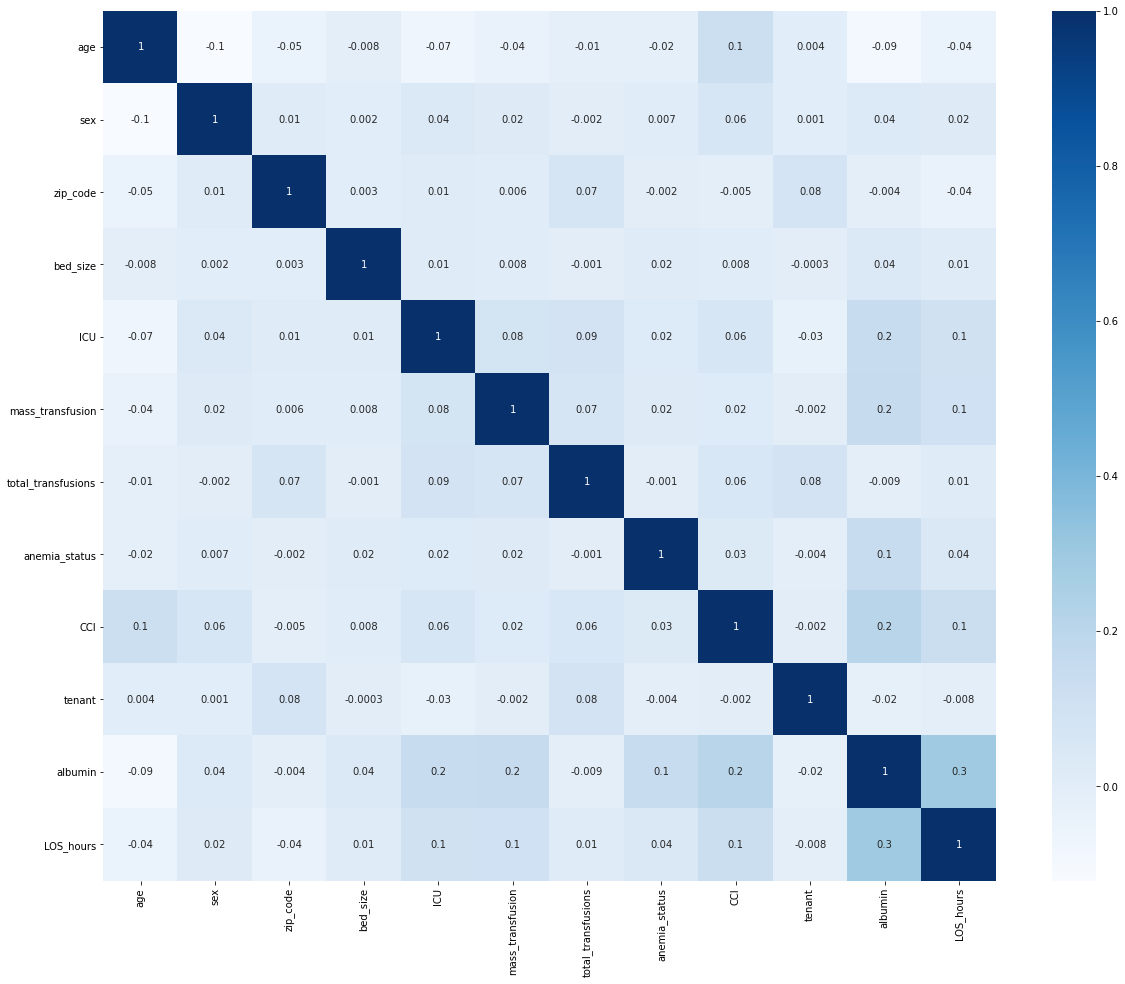

In [71]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [72]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1         5    1                 0                   1   
1  54.0    0         7         4    1                 1                   0   
2  79.0    1         9         5    0                 0                   1   
3  75.0    1         1         5    0                 0                   1   
4  74.0    0         1         5    0                 0                   0   

   anemia_status  CCI  tenant  albumin    LOS_hours  
0              2    6      45        1  1016.016667  
1              3    4      36        1   531.133333  
2              3    6       7        1    26.383333  
3              1    2      45        1    50.916667  
4              3    6      46        1  1500.383333

In [73]:
# r and p values wrt LOS variable
r1, p1 = stats.pearsonr(df['LOS_hours'], df['age'])
r2, p2 = stats.pearsonr(df['LOS_hours'], df['sex'])
r3, p3 = stats.pearsonr(df['LOS_hours'], df['zip_code'])
r4, p4 = stats.pearsonr(df['LOS_hours'], df['bed_size'])
r5, p5 = stats.pearsonr(df['LOS_hours'], df['ICU'])
r6, p6 = stats.pearsonr(df['LOS_hours'], df['mass_transfusion'])
r7, p7 = stats.pearsonr(df['LOS_hours'], df['total_transfusions'])
r8, p8 = stats.pearsonr(df['LOS_hours'], df['anemia_status'])
r9, p9 = stats.pearsonr(df['LOS_hours'], df['CCI'])
r10, p10 = stats.pearsonr(df['LOS_hours'], df['tenant'])
r11, p11 = stats.pearsonr(df['LOS_hours'], df['albumin'])

In [74]:
ivs = ['age', 'sex', 'zip_code', 'bed_size' , 'ICU', \
            'mass_transfusion', 'total_transfusions', 'anemia_status', \
            'CCI', 'tenant', 'albumin']
rs = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10 ,r11]
ps = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10 ,p11]

d = {'var': ivs, 'corr': rs, 'p-value': ps}
s_df = pd.DataFrame(data=d)

In [75]:
s_df

var      corr       p-value
0                  age -0.044955  8.196825e-71
1                  sex  0.020636  3.247807e-16
2             zip_code -0.039648  1.779330e-55
3             bed_size  0.014056  2.691507e-08
4                  ICU  0.103283  0.000000e+00
5     mass_transfusion  0.109074  0.000000e+00
6   total_transfusions  0.013890  3.912956e-08
7        anemia_status  0.043893  1.373497e-67
8                  CCI  0.136159  0.000000e+00
9               tenant -0.007556  2.797728e-03
10             albumin  0.296659  0.000000e+00

## 30D Mortality

In [76]:
# drop other dvs: LOS_hours, 30_day_readmission

df = f_df.drop(columns=['LOS_hours', '30_day_readmission'])

In [77]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1         5    1                 0                   1   
1  54.0    0         7         4    1                 1                   0   
2  79.0    1         9         5    0                 0                   1   
3  75.0    1         1         5    0                 0                   1   
4  74.0    0         1         5    0                 0                   0   

   anemia_status  CCI  tenant  albumin  30_day_mortality  
0              2    6      45        1                 0  
1              3    4      36        1                 0  
2              3    6       7        1                 0  
3              1    2      45        1                 1  
4              3    6      46        1                 0

## Correlations

In [78]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['30_day_mortality']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

zip_code             -0.010088
bed_size              0.007486
tenant                0.010049
total_transfusions    0.017210
sex                   0.019138
age                   0.033665
anemia_status         0.034313
mass_transfusion      0.061469
ICU                   0.133756
CCI                   0.151978
albumin               0.229318
30_day_mortality      1.000000
Name: 30_day_mortality, dtype: float64


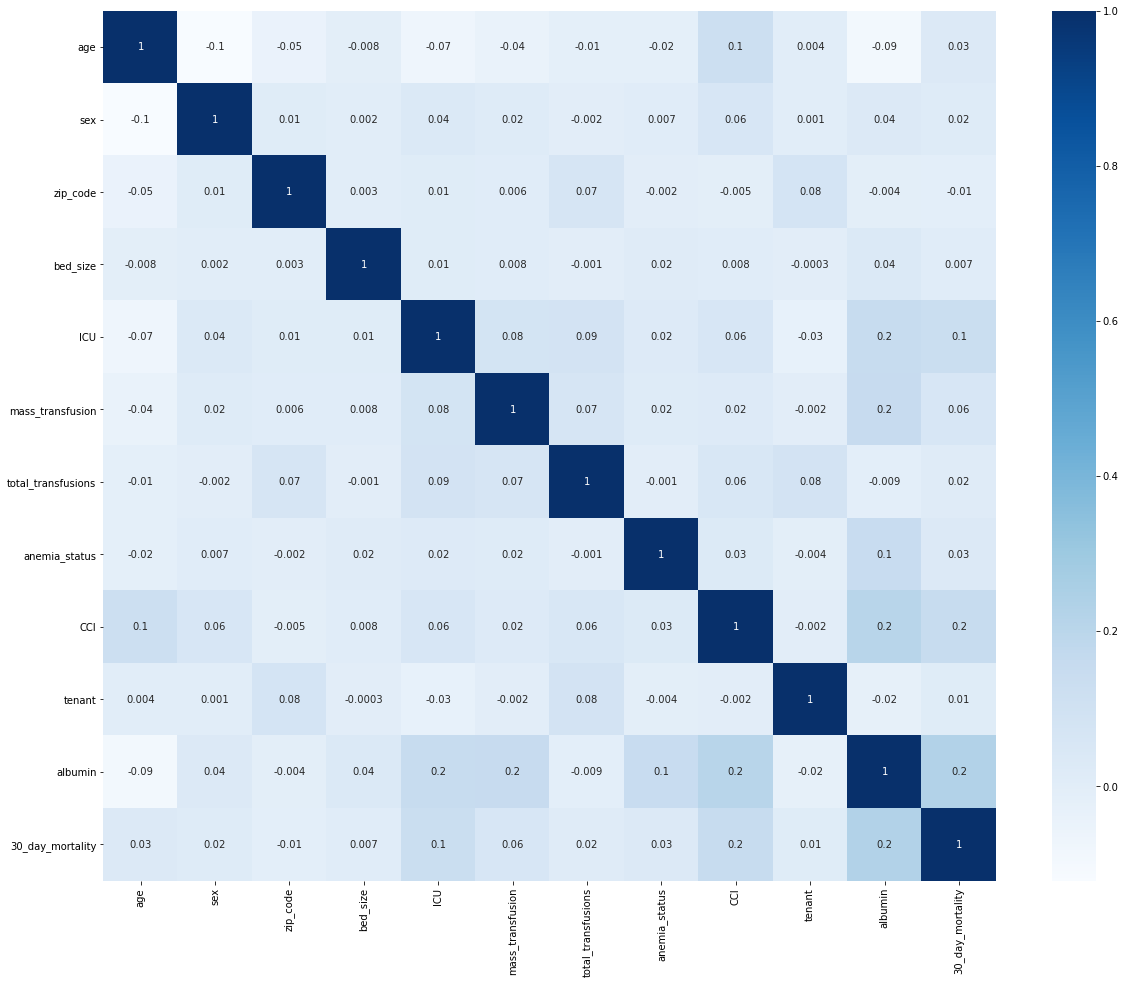

In [79]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [80]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1         5    1                 0                   1   
1  54.0    0         7         4    1                 1                   0   
2  79.0    1         9         5    0                 0                   1   
3  75.0    1         1         5    0                 0                   1   
4  74.0    0         1         5    0                 0                   0   

   anemia_status  CCI  tenant  albumin  30_day_mortality  
0              2    6      45        1                 0  
1              3    4      36        1                 0  
2              3    6       7        1                 0  
3              1    2      45        1                 1  
4              3    6      46        1                 0

In [81]:
# r and p values wrt LOS variable
r1, p1 = stats.pearsonr(df['30_day_mortality'], df['age'])
r2, p2 = stats.pearsonr(df['30_day_mortality'], df['sex'])
r3, p3 = stats.pearsonr(df['30_day_mortality'], df['zip_code'])
r4, p4 = stats.pearsonr(df['30_day_mortality'], df['bed_size'])
r5, p5 = stats.pearsonr(df['30_day_mortality'], df['ICU'])
r6, p6 = stats.pearsonr(df['30_day_mortality'], df['mass_transfusion'])
r7, p7 = stats.pearsonr(df['30_day_mortality'], df['total_transfusions'])
r8, p8 = stats.pearsonr(df['30_day_mortality'], df['anemia_status'])
r9, p9 = stats.pearsonr(df['30_day_mortality'], df['CCI'])
r10, p10 = stats.pearsonr(df['30_day_mortality'], df['tenant'])
r11, p11 = stats.pearsonr(df['30_day_mortality'], df['albumin'])

In [82]:
ivs = ['age', 'sex', 'zip_code', 'bed_size' , 'ICU', \
            'mass_transfusion', 'total_transfusions', 'anemia_status', \
            'CCI', 'tenant', 'albumin']
rs = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10 ,r11]
ps = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10 ,p11]

d = {'var': ivs, 'corr': rs, 'p-value': ps}
s_df = pd.DataFrame(data=d)

In [83]:
s_df

var      corr        p-value
0                  age  0.033665   1.762212e-40
1                  sex  0.019138   3.702110e-14
2             zip_code -0.010088   6.595261e-05
3             bed_size  0.007486   3.065016e-03
4                  ICU  0.133756   0.000000e+00
5     mass_transfusion  0.061469  7.738850e-131
6   total_transfusions  0.017210   9.873618e-12
7        anemia_status  0.034313   5.472305e-42
8                  CCI  0.151978   0.000000e+00
9               tenant  0.010049   7.032309e-05
10             albumin  0.229318   0.000000e+00

## 30D Readmission

In [84]:
# drop other dvs: LOS_hours, 30_day_mortality

df = f_df.drop(columns=['LOS_hours', '30_day_mortality'])

In [85]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1         5    1                 0                   1   
1  54.0    0         7         4    1                 1                   0   
2  79.0    1         9         5    0                 0                   1   
3  75.0    1         1         5    0                 0                   1   
4  74.0    0         1         5    0                 0                   0   

   anemia_status  CCI  tenant  albumin  30_day_readmission  
0              2    6      45        1                   0  
1              3    4      36        1                   1  
2              3    6       7        1                   1  
3              1    2      45        1                   0  
4              3    6      46        1                   0

## Correlations

In [86]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['30_day_readmission']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

albumin              -0.022245
mass_transfusion     -0.018714
anemia_status        -0.006081
age                  -0.003856
sex                  -0.002705
bed_size             -0.002443
ICU                   0.042519
tenant                0.050496
CCI                   0.083041
total_transfusions    0.133539
zip_code              0.162531
30_day_readmission    1.000000
Name: 30_day_readmission, dtype: float64


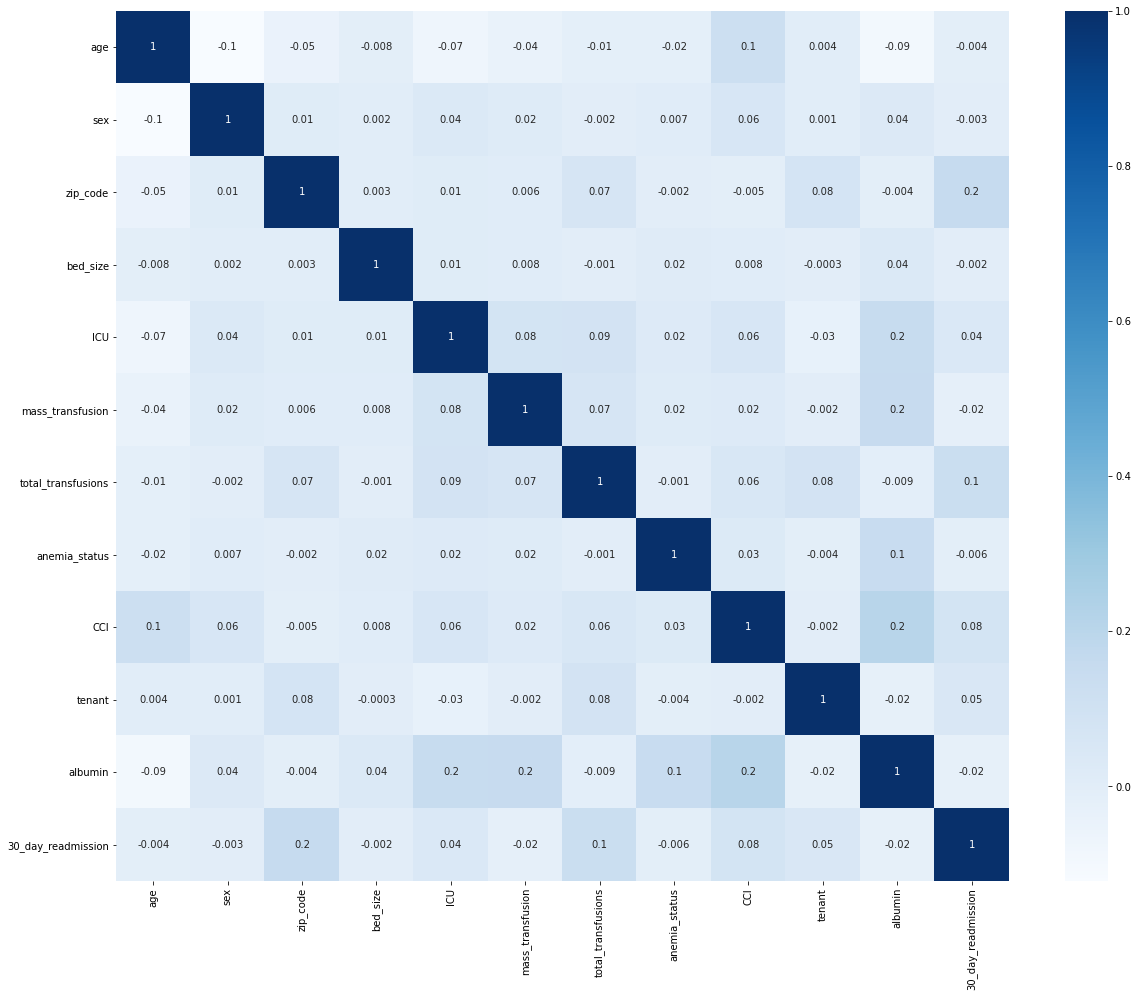

In [87]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [88]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1         5    1                 0                   1   
1  54.0    0         7         4    1                 1                   0   
2  79.0    1         9         5    0                 0                   1   
3  75.0    1         1         5    0                 0                   1   
4  74.0    0         1         5    0                 0                   0   

   anemia_status  CCI  tenant  albumin  30_day_readmission  
0              2    6      45        1                   0  
1              3    4      36        1                   1  
2              3    6       7        1                   1  
3              1    2      45        1                   0  
4              3    6      46        1                   0

In [89]:
# r and p values wrt LOS variable
r1, p1 = stats.pearsonr(df['30_day_readmission'], df['age'])
r2, p2 = stats.pearsonr(df['30_day_readmission'], df['sex'])
r3, p3 = stats.pearsonr(df['30_day_readmission'], df['zip_code'])
r4, p4 = stats.pearsonr(df['30_day_readmission'], df['bed_size'])
r5, p5 = stats.pearsonr(df['30_day_readmission'], df['ICU'])
r6, p6 = stats.pearsonr(df['30_day_readmission'], df['mass_transfusion'])
r7, p7 = stats.pearsonr(df['30_day_readmission'], df['total_transfusions'])
r8, p8 = stats.pearsonr(df['30_day_readmission'], df['anemia_status'])
r9, p9 = stats.pearsonr(df['30_day_readmission'], df['CCI'])
r10, p10 = stats.pearsonr(df['30_day_readmission'], df['tenant'])
r11, p11 = stats.pearsonr(df['30_day_readmission'], df['albumin'])

In [90]:
ivs = ['age', 'sex', 'zip_code', 'bed_size' , 'ICU', \
            'mass_transfusion', 'total_transfusions', 'anemia_status', \
            'CCI', 'tenant', 'albumin']
rs = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10 ,r11]
ps = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10 ,p11]

d = {'var': ivs, 'corr': rs, 'p-value': ps}
s_df = pd.DataFrame(data=d)

In [91]:
s_df

var      corr        p-value
0                  age -0.003856   1.271938e-01
1                  sex -0.002705   2.845298e-01
2             zip_code  0.162531   0.000000e+00
3             bed_size -0.002443   3.337903e-01
4                  ICU  0.042519   1.552507e-63
5     mass_transfusion -0.018714   1.328702e-13
6   total_transfusions  0.133539   0.000000e+00
7        anemia_status -0.006081   1.614820e-02
8                  CCI  0.083041  1.857909e-237
9               tenant  0.050496   7.082308e-89
10             albumin -0.022245   1.364382e-18